## Coding a Decision Tree

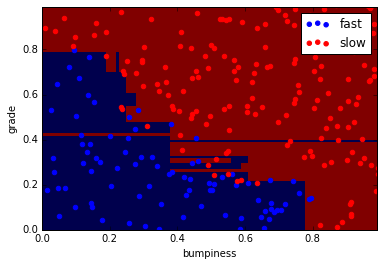

In [1]:
import sys
sys.path.append("C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/tools/")
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/choose_your_own')
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/svm')

import os
os.chdir('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/decision_tree')


""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from sklearn import tree

features_train, labels_train, features_test, labels_test = makeTerrainData()


#def classify(features_train, labels_train, **kwargs):
#    clf = tree.DecisionTreeClassifier(**kwargs)
#    clf = clf.fit(features_train, labels_train)
#    return clf


### the classify() function in classifyDT is where the magic
### happens--it's your job to fill this in!
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)







#### grader code, do not modify below this line
%matplotlib inline
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())

## Decision Tree Accuracy

In [2]:
# method 1
acc= clf.score(features_test, labels_test)

# method 2
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)

print acc

0.908


## Decision Tree Accuracy

In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()



########################## DECISION TREE #################################


### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively

clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(features_train, labels_train)

clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50 = clf50.fit(features_train, labels_train)
#clf50 = classify(features_train, labels_train, min_samples_split=50)
#clf = tree.DecisionTreeClassifier(min_samples_split=50).fit(features_train, labels_train)

acc_min_samples_split_2 = clf2.score(features_test, labels_test)
acc_min_samples_split_50 = clf50.score(features_test, labels_test)

## Entropy Calculation Part 5

In [4]:
import scipy.stats

pk = [0.5, 0.5]
print scipy.stats.entropy(pk, base=2)

1.0


## Information Gain Calculation Part 5

In [5]:
print scipy.stats.entropy([1,2], base=2)

0.918295834054


## Information Gain Calculation Part 6

In [6]:
print 1-0.75*scipy.stats.entropy([1,2], base=2)

0.311278124459


## Your First Email DT: Accuracy

In [7]:
""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
from time import time
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)

no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.978384527873


## Speeding Up Via Feature Selection 1

In [8]:
print features_train.shape

(15820L, 3785L)


## Changing the Number of Features

In [9]:
# I made "percentile" an input argument for preprocess with default value 10
features_train, features_test, labels_train, labels_test = preprocess(percentile=1)
print features_train.shape

no. of Chris training emails: 7936
no. of Sara training emails: 7884
(15820L, 379L)


## Accuracy Using 1% of Features

In [10]:
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)

0.967007963595
